# EDA on Penguins

In this notebook exercise, we will conduct simple EDA steps on the popular penguins dataset.

### Load the dataset

Dataset source: https://github.com/allisonhorst/palmerpenguins

In [66]:
import seaborn as sns

In [67]:
df = sns.load_dataset('penguins')

In [68]:
df.shape

(344, 7)

# Step 1 Understand the Features

You can find information about this dataset here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

**Question: in your own words**:
1. describe each feature
2. mention its type (numeric or categorical)
3. write its name in Arabic

Note: use a Markdown cell.

- The dataset consists of 7 columns.

- species (الأنواع): penguin species. categorical
- bill_length_mm (طول المنقار) numeric
- bill_depth_mm:  عمق المنقار numeric
- flipper_length_mm:  طول الجناح numeric 
- body_mass_g: الكتلة numeric
- island:  اسم الجزيرةisland name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) categorical
- sex : penguin sex جنس البطريق categorical

Hint: you can attach an image to illustrate what the features are.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

# Step 2

- Have a look at the columns and their values (`head`, `sample`, `tail`)
- Look at the technical information (`info`)

In [69]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [70]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [71]:
df.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
280,Gentoo,Biscoe,45.3,13.8,208.0,4200.0,Female
103,Adelie,Biscoe,37.8,20.0,190.0,4250.0,Male
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
131,Adelie,Torgersen,43.1,19.2,197.0,3500.0,Male


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Step 3

1. For each column, check and handle missing values; state your strategy and justify it. Examples:
    - Strategy: drop the column. Justification: ...?
    - Strategy: fill missing values. Justificaiton: ...?
    - Strategy: drop the row. Justification: ...?
1. Calculate count and percentage of missing values before handling them
1. Check and handle duplicated rows
1. Calculate the percentage of data loss after cleaning

In [73]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [74]:
import pandas as pd
#Handling missing values
#Calculate null counts and percentages for each column in the dataset
null_counts = df.isna().sum()
null_percentage = (df.isna().mean() * 100)
#Combine the counts and percentages into a single DataFrame for display
null_val = pd.DataFrame({'Null Count': null_counts, 'Percentage': null_percentage})
#Print the DataFrame,
print(null_val)

                   Null Count  Percentage
species                     0    0.000000
island                      0    0.000000
bill_length_mm              2    0.581395
bill_depth_mm               2    0.581395
flipper_length_mm           2    0.581395
body_mass_g                 2    0.581395
sex                        11    3.197674


In [75]:
drop_nul = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g','sex']

# Drop rows with null values in columns 
df.dropna(subset=drop_nul, inplace=True)

In [76]:
df.duplicated().sum()

0

In [77]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Step 4

#### Data types conversion
- We shall convert the string types to `category` to preserve memory
- numeric types can be stored in less precision: `float32`

In [78]:
mem_usage_before = df.memory_usage(deep=True)

In [79]:
# convert categotical types
df['species'] = df['species'].astype('category')
df['island']= df['island'].astype('category')
df['sex']= df['sex'].astype('category')


In [80]:
# convert numerical types
df['bill_depth_mm'] = df['bill_depth_mm'].astype('float32')
df['bill_length_mm'] = df['bill_length_mm'].astype('float32')
df['flipper_length_mm'] = df['flipper_length_mm'].astype('float32')
df['body_mass_g'] = df['body_mass_g'].astype('float32')

Calculate memory saved after type conversion

In [81]:
# mem_usage_after = ...?

mem_usage_after = df.memory_usage(deep=True)

In [82]:
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')

memory saved: 64 KB


# Step 5

#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

- hint: use `.unique()` to check the number of unique values in a column
- you can also use: `.value_counts()` to check the frequency of each value in a column

In [83]:
df['species'].unique()

['Adelie', 'Chinstrap', 'Gentoo']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

In [84]:
df['sex'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [85]:
df['island'].unique()

['Torgersen', 'Biscoe', 'Dream']
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']

In [86]:
df.astype('category').describe()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.0,333.0,333.0,333
unique,3,3,163.000000,79.0,54.0,93.0,2
top,Adelie,Biscoe,41.099998,17.0,190.0,3800.0,Male
freq,146,163,7.000000,12.0,21.0,12.0,168


# Step 6: Univariate Analysis

- Separate numerical from categorical columns (hint; use `df.select_dtypes()`)
- Look at the statistical information for each:
    - `df_num.describe().T`
    - `df_cat
    .describe().T`

In [87]:
num_col = df.select_dtypes(include='number')
cat_col = df.select_dtypes(exclude='number')

In [88]:
num_col.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992794,17.164865,200.966965,4207.057129
std,5.468668,1.969235,14.015767,805.215820
min,32.099998,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.299999,197.000000,4050.000000
75%,48.599998,18.700001,213.000000,4775.000000
max,59.599998,21.500000,231.000000,6300.000000


In [89]:
cat_col.describe()

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


Use charts to plot `value_counts()` categorical variables:
1. plot `species` using bar plot
1. plot `island` using pie chart
1. plot `sex` using horizontal bar plot

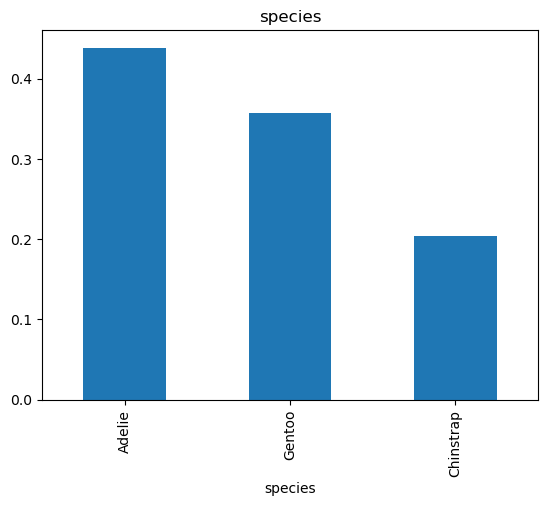

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

#bar plot for species
(df['species'].value_counts() / len(df)).plot.bar()
plt.title('species')
plt.show()

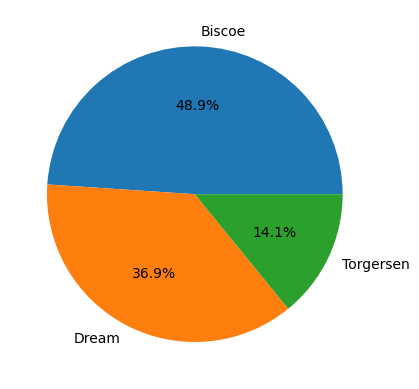

In [91]:
plt.pie(x=df['island'].value_counts().values,
        labels=df['island'].value_counts().index,
        autopct='%0.1f%%')
plt.show()

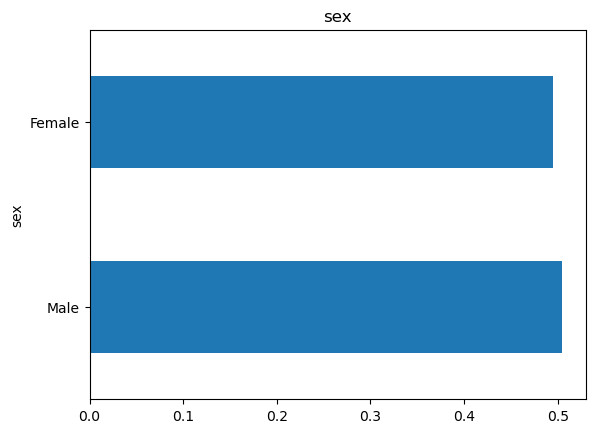

In [92]:
#bar plot for sex
(df['sex'].value_counts() / len(df)).plot.barh()
plt.title('sex')
plt.show()

Plot numerical variables:

1. Boxplot: `bill_length_mm`
1. Histogram: `bill_depth_mm`
1. Boxplot: `flipper_length_mm`
1. Histogram: `body_mass_g`

(array([0, 1]),
 [Text(0, 0, 'bill_length_mm'), Text(1, 0, 'flipper_length_mm')])

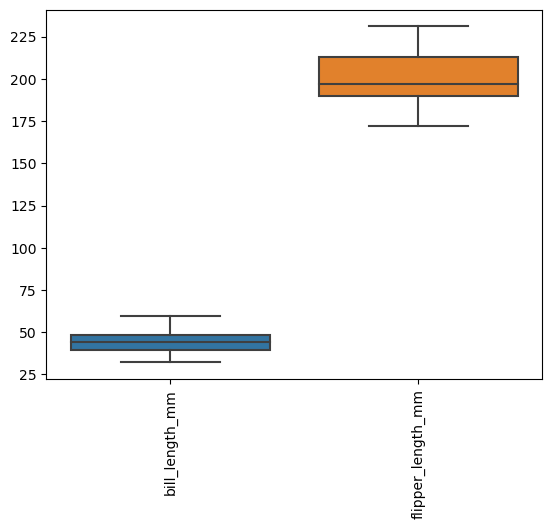

In [93]:
box_col = df[['bill_length_mm', 'flipper_length_mm']]
sns.boxplot(data=box_col)
plt.xticks(rotation=90)

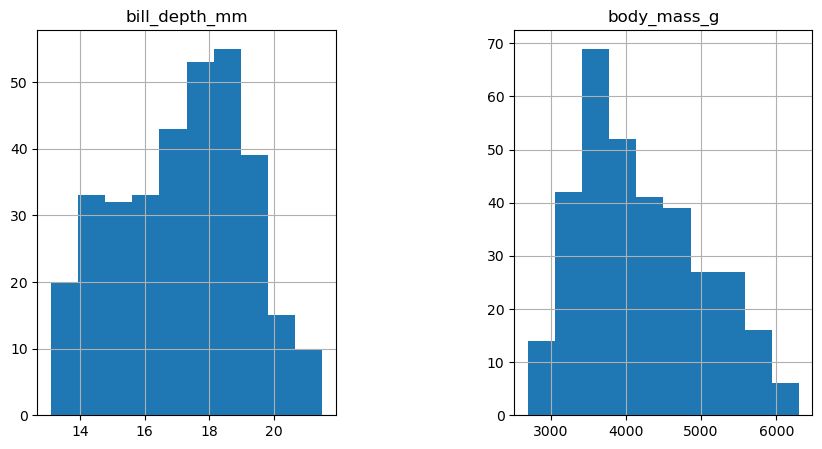

In [94]:
his_col =df[['bill_depth_mm','body_mass_g']]

#define number of subplots
fig, axis = plt.subplots(1, 2,  figsize=(10,5))

#create histogram 
his_col.hist(ax=axis)
plt.subplots_adjust(hspace=0.6, wspace=0.6)


## Step 7: Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

- Hint: you can use the `df.corr()` to find the correlation matrix.
- Hint: you can use `sns.heatmap()` to plot the correlation matrix

Write down your observations based on the correlation heatmap.

Observations:

### Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [95]:
correlation=num_col.corr()
correlation

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

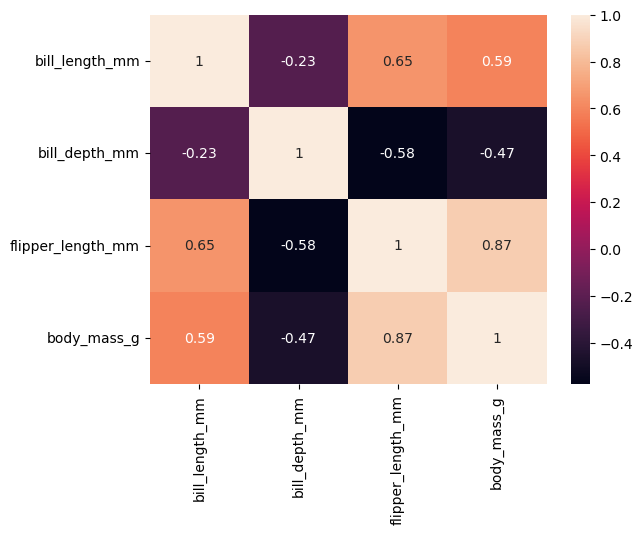

In [96]:
sns.heatmap(correlation, annot=True)

- There is a strong correlation between flipper length and body mass,
- also there is a correlation  between flipper length and bill length

In [97]:
# adding the feature bill_size which is the product of bill_length and bill_depth

df['bill_size']=df['bill_length_mm']*df['bill_depth_mm']
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_size
0,Adelie,Torgersen,39.099998,18.700001,181.0,3750.0,Male,731.169983
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.0,Female,687.299988
2,Adelie,Torgersen,40.299999,18.000000,195.0,3250.0,Female,725.399963
4,Adelie,Torgersen,36.700001,19.299999,193.0,3450.0,Female,708.309998
5,Adelie,Torgersen,39.299999,20.600000,190.0,3650.0,Male,809.580017


In [98]:
# add bill_ratio which is the ratio of bill_length to bill_depth
df['bill_ratio']=df['bill_length_mm']/df['bill_depth_mm']
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_size,bill_ratio
0,Adelie,Torgersen,39.099998,18.700001,181.0,3750.0,Male,731.169983,2.090909
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.0,Female,687.299988,2.270115
2,Adelie,Torgersen,40.299999,18.000000,195.0,3250.0,Female,725.399963,2.238889
4,Adelie,Torgersen,36.700001,19.299999,193.0,3450.0,Female,708.309998,1.901554
5,Adelie,Torgersen,39.299999,20.600000,190.0,3650.0,Male,809.580017,1.907767


Let's look at the correlation to see whether the newly created features are better.

<Axes: >

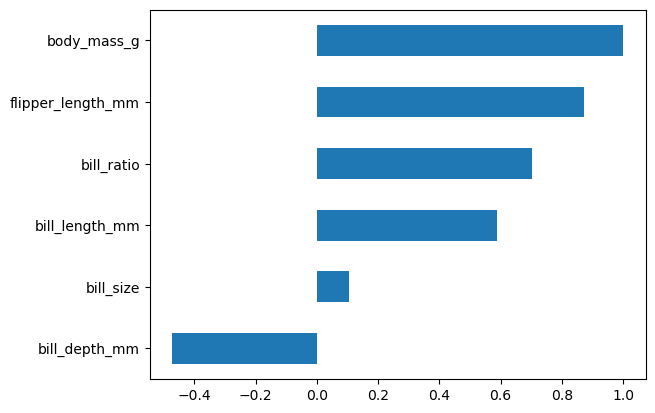

In [99]:
# This plots the correlation values for a specific column
# which is usually what we are interested in
num_newcol = df.select_dtypes(include='number')

new_corr=num_newcol.corr()

new_corr['body_mass_g'].sort_values().plot.barh()

<Axes: >

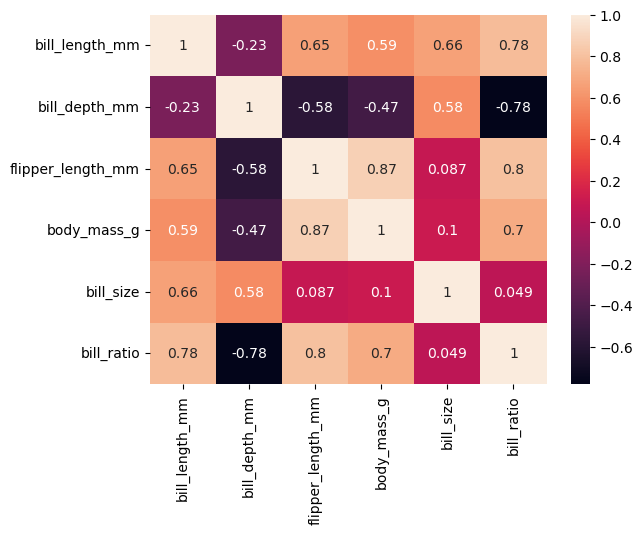

In [100]:
sns.heatmap(new_corr, annot=True)

- There is a correlation between bill ratio and (bill length, body mass and flibber length)